## Exploration 10. Create CIFAR-10 Image 📸

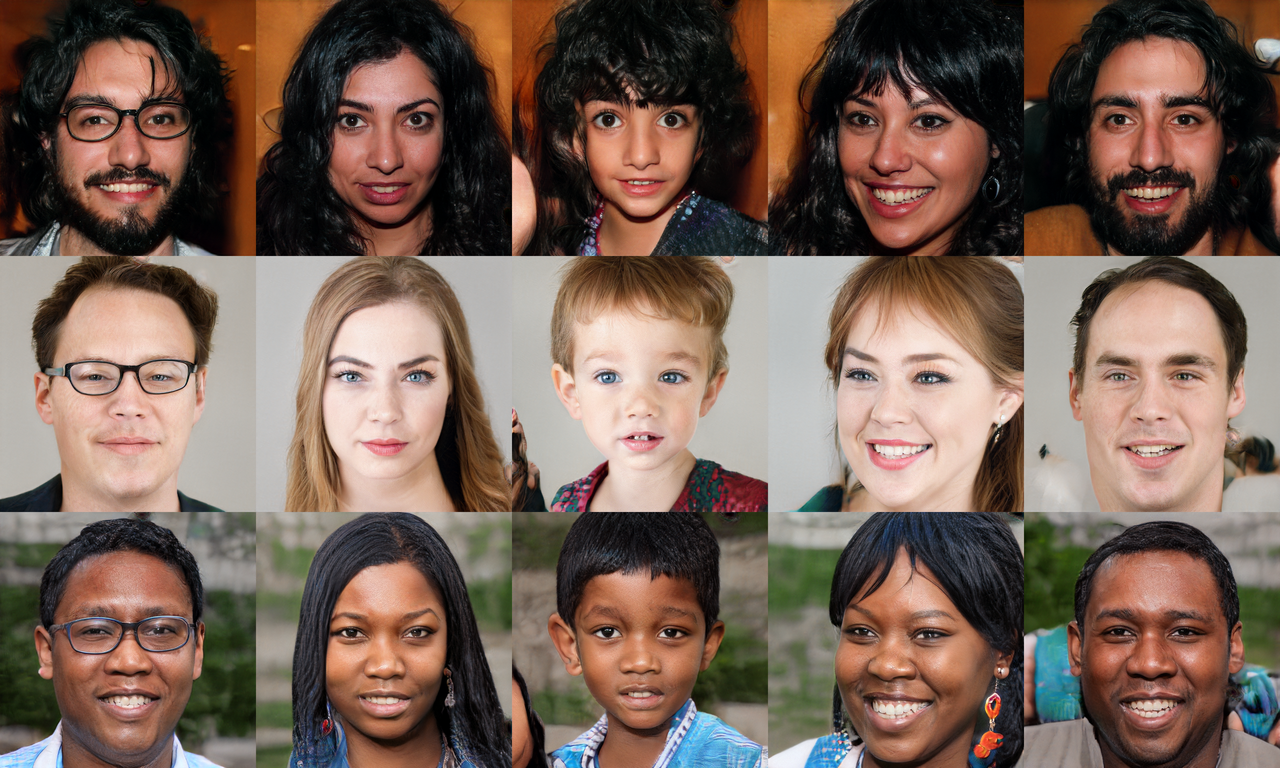
<center>[Img1] Image generated by Gan Model</center>

## Table of content

### 1. Introduction

* 1.1 What is GAN?
* 1.2 Why Gan?
* 1.3 What is DCGAN?

### 2. Experiment Environment Set-up

* 2.1 Import Libraries
* 2.2 Create Folders

### 3. Load and View Data

* 3.1 CIFAR-10 Dataset
* 3.2 Load Data
* 3.3 Data Normalization
* 3.4 Data Visualization
* 3.5 Dataset Preparation

### 4. Implementing the Generator Model

* 4.1 Function of Generator Model
* 4.2 Generator Model Summary
* 4.3 Check the Generator Model Output

### 5. Implementing the Discriminator Model

* 5.1 Function of Discriminator Model
* 5.2 Discriminator Model Summary
* 5.3 Check the Discriminator Model Output

### 6. Implementing Loss, Optimization Functions and Accuracy

* 6.1 Implementing Loss Function
  * 6.1.1 Generator Loss
  * 6.1.2 Discriminator Loss
* 6.2 Implementing Discriminator Accuracy
* 6.3 Implementing Optimizer Function

### 7. Implementing Detailed Training Process

* 7.1 Implementing `train_step` Function
* 7.2 Implementing `generate_and_save_images` Function
* 7.3 Implementing `draw_train_history` Function
* 7.4 Implementing `checkpoint`

### 8. Progress the Training Process

* 8.1 Train a Model
* 8.2 Check the Result
* 8.3 Conclusion

### 9. Improving the GAN Training Process

* 9.1 Increase Epochs
* 9.2 Only in Cat Class
  * 9.2.1 500 Epochs
  * 9.2.2 3,000 Epochs
  * 9.2.3 6,000 Epochs
  * 9.2.4 Modifying Parameters (500 Epochs)
  * 9.2.5 Modifying Parameters (3000 Epochs)
  * 9.2.6 Modifying the Generator Model (500 Epochs)
* 9.3 Training CIFAR10 Image

### 10. Retrospection

***

### 1. Introduction

### 1.1 What is GAN?

GAN이란 무엇인가? GAN은 Generative Adversarial Nets이라는 논문을 통해 나온 모델로 위와 같이 진짜와 동일해 보이는 이미지를 생성하는 모델이다. 

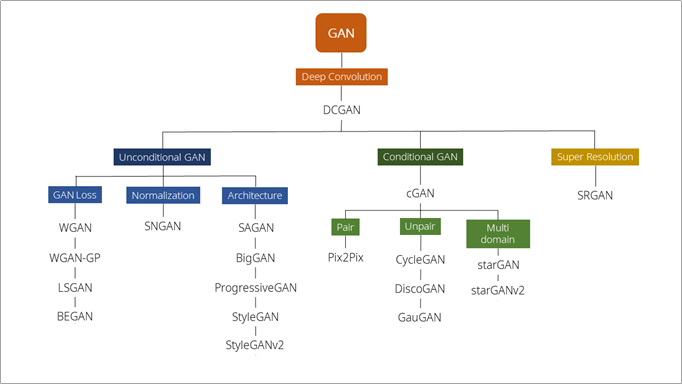
<center>[Img4] Taxnomoy of GAN</center>

* DCGAN : 얀르쿤이 GAN을 낳았다면 Facebook은 DCGAN을 통해 모든 후속연구가 이어질 수 있도록 키운 모델
* LSGAN : 기존 GAN에 적용된 Loss의 수식을 Least Square loss로 바꾸어 성능 향상을 도모한 모델
* PGGAN : 기존 모델과 달리 점진적으로 학습하여 1024x1024의 고화질 이미지 생성을 가능하게 한 모델
* SRGAN : GAN 모델의 인지적 해상도를 높여 고화질 이미지 생성을 가능하게 한 모델
* CycleGAN : 역함수 개념과 순환일관성 손실 함수를 이용해 특정 이미지의 화풍을 다른 이미지에 적용할 수 있게 한 모델
* StarGAN : 단일 생성자/판별자로 Domain Transfer가 가능하도록 만든 모델

### 1.2 Why Gan?

여러 이유가 있지만 그 중 단연 핵심이라 생각되는 것은 바로 기존의 지도학습의 한계 때문이다.
기존의 지도학습의 경우 데이터셋이 필수적으로 수반된다. 하지만 이러한 데이터셋을 만드는 과정에 드는 시간 등의 비용의 한계가 있기 때문에 어렵다는 것이다. 하지만 GAN은 지도학습에 사용되는 라벨 없이도 학습 가능한 비지도학습에 속하며, 데이터를 직접 생성하는 큰 장점을 가진다. 따라서 GAN의 경우 비지도학습의 선두주자로 불리고도 있으며, 몇몇의 사람들은 비지도학습이 더욱 각광받는 기술이 될 것이라 전망한다.그래서 아직까지 GAN이라고 하는 모델이 각광받고 있고 후속 연구들이 이어지고 있는 것이다.

### 1.3 What is DCGAN (Deep Convolutional GAN)?

기존의 GAN으로는 성능이 잘 나오지 않았는데 그 이유는 간단하게 Fully-Connected 되어 있는 구조이기 때문이다. 따라서 Facebook은 DCGAN이라고 하는 모델을 내놓으며 **Fully-Connected 구조를 CNN으로 바꾸어 GAN의 성능 향상을 도모한 것**이 핵심이라 할 수 있다.

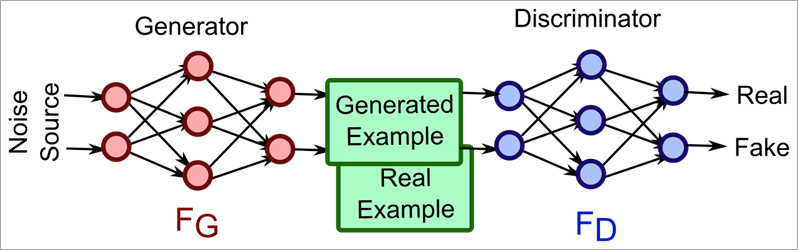
<center>[Img4] Structure of Original GAN</center>

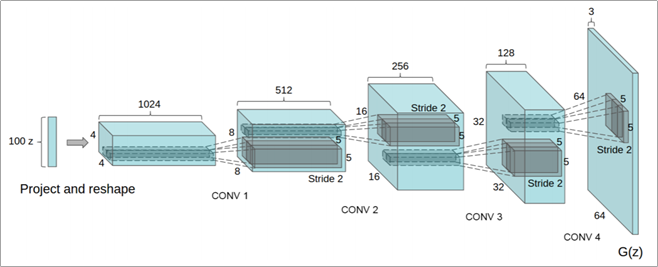
<center>[Img5] Structure of DCGAN (Generator)</center>

DCGAN은 생성자 모델에 Transposed Convolutional Network를 사용하여 Up-Sampling하는데 사용하였다. 위 그림에는 나와 있지 않지만 판별자 모델에는 단순 Convolutional Network를 사용한 것이 특징이다.

### 2. Experiment Environment Set-up

### 2.1 Import Libraries

In [1]:
import os
import glob
import time

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

### 2.2 Create Folders

In [2]:
os.makedirs(os.getenv('HOME')+"/aiffel/dcgan_newimage/result_cifar10/training_history", exist_ok=True)
os.makedirs(os.getenv('HOME')+"/aiffel/dcgan_newimage/result_cifar10/generated_samples", exist_ok=True)
os.makedirs(os.getenv('HOME')+"/aiffel/dcgan_newimage/result_cifar10/training_checkpoints", exist_ok=True)

### 3. Load and View Data

### 3.1 CIFAR-10 Dataset

* The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. * There are 50000 training images and 10000 test images.
* The dataset is divided into five training batches and one test batch, each with 10000 images.
* The test batch contains exactly 1000 randomly-selected images from each class.
* The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.
* These are the classes in the dataset:airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck
* The classes are completely mutually exclusive. i.e. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

### 3.2 Load Data

* 분류 문제에서와 달리, **각 이미지가 어떤 카테고리인지 나타내주는 라벨이 필요 없다.**
* 즉, 분류 문제를 풀었을 때 필요했던 y_train, y_test에 해당하는 데이터를 쓰지 않는 것이다.
* 그렇기 때문에 코드에서 `_` (언더스코어)로 해당 데이터들은 무시하도록 한다.

In [3]:
cifar10 = tf.keras.datasets.cifar10
(train_x, _), (test_x, _) = cifar10.load_data()
train_x.shape

(50000, 32, 32, 3)

In [4]:
print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 255
min pixel: 0


### 3.3 Data Normalization

* CIFAR-10은 32x32 픽셀의 이미지로, 각 픽셀은 0~255 사이의 정숫값을 가진다.
* 각 픽셀을 -1, 1로 정규화시켜서 사용할 예정이므로, 중간값을 0으로 맞춰주기 위해 127.5를 뺀 후 127.5로 나눠준다.

In [5]:
train_x = (train_x - 127.5) / 127.5 # 이미지를 [-1, 1]로 정규화

print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 1.0
min pixel: -1.0


In [6]:
train_x.shape

(50000, 32, 32, 3)

* 앞서 읽었던 Dataset 정보에서 확인했듯이, train 데이터셋에는 5만 장의 이미지가 들어있다. 또, 이미지의 사이즈는 32x32임을 확인할 수 있다.
* 마지막 `3`은 채널 수에 대한 차원이다. CIFAR-10은 컬러 이미지이므로 `3 (R, G, B 세 개의 채널)`이 출력된다.

### 3.4 Data Visualization

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


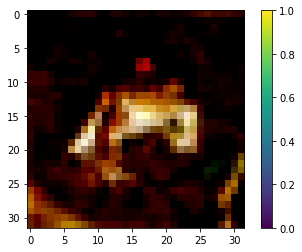

In [7]:
# 첫 번째 이미지 꺼내서 확인해보기(시각화)

plt.imshow(train_x[0].reshape(32, 32, 3))
plt.colorbar()
plt.show()

* 무슨 사진인지 모르겠다. 앞에서 진행한 이미지 정규화 때문인 듯하다.
* `plt.colorbar()` 를 이용해 오른쪽에 각 픽셀의 값과 그에 따른 색도 확인해 보았다.
* 픽셀에는 정규화 해준 대로 -1 ~ 1 사이의 값을 가지고, -1이 가장 어두운 검은색, 1이 가장 밝은 흰색을 띤다고 표시되어 있다.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

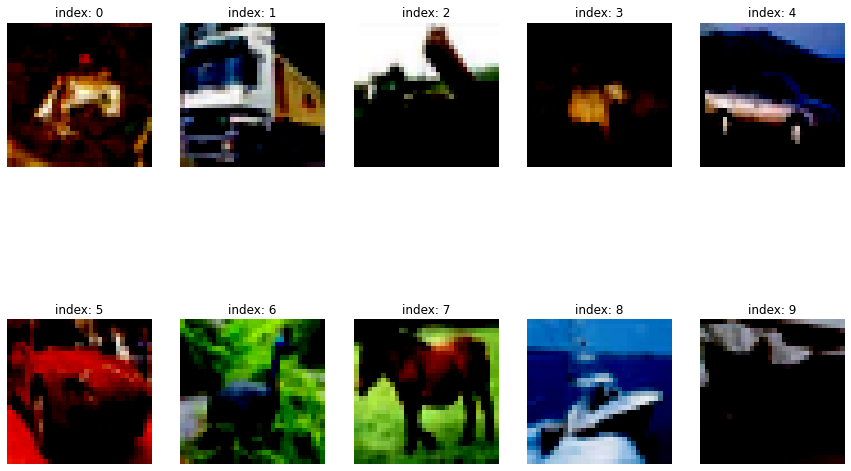

In [8]:
# 이미지 열 개 정도 한 번에 띄워보기

plt.figure(figsize=(15, 10))  # 이미지의 전체 프레임의 크기 결정

for i in range(10):
    plt.subplot(2, 5, i+1)  # 여러 개의 이미지를 한 번에 띄우기(10개의 이미지, 2x5의 배열 형태)
    plt.imshow(train_x[i].reshape(32, 32, 3))
    plt.title(f'index: {i}')  # 이미지에 제목으로 라벨 값
    plt.axis('off')  # 불필요한 축 지우기
plt.show()

### 3.5 Dataset Preparation

In [9]:
BUFFER_SIZE = 50000  # 전체 데이터를 섞기 위해 50,000으로 설정
BATCH_SIZE = 256  # 모델이 한 번에 학습할 데이터의 양

In [10]:
# 정리된 데이터를 곧 모델에 넣어서 학습시켜야 하니, 편하게 사용할 수 있도록 텐서플로우의 Dataset을 이용해 준비
# shuffle() 함수가 데이터셋을 잘 섞어서 모델에 넣어준다.
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

### 4. Implementing the Generator Model

### 4.1 Function of Generator Model

In [11]:
# make_generator_model이라는 함수를 만들어서 언제든 생성자를 생성할 수 있도록 한다.
def make_generator_model():

    # Start
    # tf.keras.Sequential()로 모델을 시작한 후 레이어를 쌓는다.
    model = tf.keras.Sequential()

    # First: Dense layer
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Second: Reshape layer
    model.add(layers.Reshape((8, 8, 256)))

    # Third: Conv2DTranspose layer
    # Conv2DTranspose 층은 일반적인 Conv2D와 반대로 이미지 사이즈를 넓혀주는 층
    model.add(layers.Conv2DTranspose(128, kernel_size=(5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fourth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(64, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fifth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(3, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False, \
                                     activation='tanh'))

    return model

* 레이어의 사이사이에 특정 층들이 반복되는 것을 확인할 수 있다.
* `BatchNormalization` 레이어 : 신경망의 가중치가 폭발하지 않도록 가중치 값을 정규화
* 중간층들의 활성화 함수는 모두 `LeakyReLU` 사용
* -1 ~ 1 이내의 값으로 픽셀 값을 정규화시켰던 데이터셋과 동일하게 하기 위해 마지막 층에는 활성화 함수로 `tanh` 사용 
* 모델은 입력값으로 (batch_size, 100) 형상의 노이즈 벡터를 받는다.
* 입력된 (batch_size, 100) 벡터는 8x8x256=16384개의 노드를 가진 첫 번째 Dense 레이어를 거치며, (batch_size, 16384) 형상의 벡터가 된다.
* 첫 번째 레이어를 지난 후 벡터는 Reshape 레이어를 지나게 된다.
* 이는 이후의 Layer에서 Convolutional 연산을 할 수 있도록 1차원 벡터를 (8, 8, 256) 형상의 3차원 벡터로 변환시키는 작업이다.

### 4.2 Generator Model Summary

In [12]:
# generator라는 변수로 생성하고, 모델 세부 내용인 summary 출력
generator = make_generator_model()
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16384)             1638400   
_________________________________________________________________
batch_normalization (BatchNo (None, 16384)             65536     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 16384)             0         
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8, 8, 128)         0

### 4.3 Check the Generator Model Output

* `noise = tf.random.normal([1, 100])`로 생성된 랜덤 노이즈를 입력으로 하여 방금 구현한 생성자로 랜덤 이미지를 생성한다.
* 생성된 랜덤 이미지가 생성자 출력 규격에 잘 맞는지 확인해본다.

In [13]:
# shape=(1, 100)의 형상을 가지는 랜덤 노이즈 벡터를 생성해서 결과물을 한번 만들어 본다.
# 아직 모델이 학습되지 않았으므로 결과물도 큰 의미가 있지는 않을 것
# tf.random.normal을 이용하면 가우시안 분포에서 뽑아낸 랜덤 벡터로 이루어진 노이즈 벡터를 만들 수 있다.

noise = tf.random.normal([1, 100])

In [14]:
# 지금은 학습하는 중이 아니므로 training=False
# Batch Normalization 레이어는 훈련 시기와 추론(infernce) 시기의 행동이 다르기 때문에 
# training=False을 주어야 올바른 결과를 얻을 수 있다.

generated_image = generator(noise, training=False)
generated_image.shape

TensorShape([1, 32, 32, 3])

* [1, 32, 32, 3]사이즈의 이미지가 생성되었다.
* 첫 번째 1은 1개(batch_size=1)라는 뜻, 그 뒤로는 (32, 32, 3) 사이즈 이미지가 생성되었다는 뜻이다.

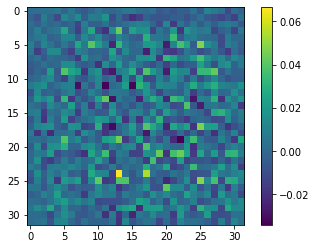

In [15]:
# 생성된 이미지 시각화
# matplotlib 라이브러리는 2차원 이미지만 보여줄 수 있다.
# 0번째와 3번째 축의 인덱스를 0으로 설정해서 (32, 32) shape의 이미지를 꺼낼 수 있도록 한다.

plt.imshow(generated_image[0, :, :, 0])
plt.colorbar()
plt.show()

* -1과 1 사이의 값에서 적당히 잘 생성된 것을 확인할 수 있다.

### 5. Implementing the Discriminator Model

* (32, 32, 3)의 이미지를 입력으로 받아 1dim을 판별결과를 출력하는 판별자 모델 구현 함수를 작성해 봅시다.
* 위 STEP 2에서 생성한 랜덤 이미지를 판별자 모델이 판별한 결과값을 확인해 봅시다.

* 판별자는 가짜 이미지와 진짜 이미지를 입력받으면 각 이미지 별로 '진짜라고 판단하는 정도'값을 출력해야 한다.
* 그렇다면 입력은 (32, 32, 3) 크기의 이미지가, 출력은 단 하나의 숫자(진짜라고 판단하는 정도)가 될 것이다.

### 5.1 Function of Discriminator Model

In [16]:
# 판별자 또한 make_discriminator_model 함수로 구현
def make_discriminator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Conv2D Layer
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[32, 32, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Second: Conv2D Layer
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Third: Flatten Layer
    model.add(layers.Flatten())

    # Fourth: Dense Layer
    model.add(layers.Dense(1))

    return model

* 판별자는 `Conv2D` 층으로 이미지의 크기를 점점 줄여나간다.
* 첫 번째 Conv2D 층에서 입력된 `[32, 32, 3]` 사이즈의 이미지는 다음 층을 거치며 `(32, 32, 3) → (16, 16, 64) → (8, 8, 128)`까지 줄어들게 된다.
* 마지막에는 `Flatten` 층을 사용해 3차원 이미지를 1차원으로 쭉 펴서 8x8x128=8192, 즉 (1, 8192) 형상의 벡터로 변환한다. 
* 이는 생성자의 `Reshape` 층에서 1차원 벡터를 3차원으로 변환했던 것과 정확히 반대 역할을 한다. 
* 1차원 벡터로 변환한 후에는 마지막 Dense Layer를 거쳐 단 하나의 값을 출력하게 된다.

### 5.2 Discriminator Model Summary

In [17]:
# 판별 모델을 discriminator라는 변수 이름으로 생성
# 모델 세부 내용인 summary를 출력

discriminator = make_discriminator_model()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 64)        4864      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)             

### 5.3 Check the Discriminator Model Output

In [18]:
# 판별자에 위에서 생성했던 가짜 이미지를 입력

decision = discriminator(generated_image, training=False)
decision

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00079002]], dtype=float32)>

* 텐서플로우의 텐서 형태로 출력된다.
* 아직은 아무런 의미가 없는 값일 것이다.

### 6. Implementing Loss, Optimization Functions and Accuracy

* Real Image에 대한 라벨을 1, Fake Image에 대한 라벨을 0으로 두었을 때, 각각의 손실함수를 이용해 정량적으로 달성해야 하는 목표하는 결과는 다음과 같다. 
  * 생성자 : 판별자가 Fake Image에 대해 판별한 값, 즉 `D(fake_image)` 값이 1에 가까워지는 것
  * 판별자 : Real Image 판별값, 즉 `D(real_image)`는 `1`에, Fake Image 판별값, 즉 `D(fake_image)`는 `0`에 가까워지는 것
* 결국 생성자든 구분자든, 결국 손실함수에 들어가는 값은 모두 판별자의 판별값이 된다.

* 교차 엔트로피를 계산하기 위해 입력할 값은 판별자가 판별한 값이다. 
* 판별자 모델의 맨 마지막 Layer에는 값을 정규화시키는 sigmoid나 tanh 함수와 같은 활성화 함수가 없었다. 
* 구분자가 출력하는 값은 범위가 정해지지 않아 모든 실숫값을 가질 수 있다. 
* tf.keras.losses의 BinaryCrossEntropy 클래스는 기본적으로 본인에게 들어오는 인풋값이 0-1 사이에 분포하는 확률값이라고 가정한다.
* 따라서 `from_logits`를 `True`로 설정해 주어야 `BinaryCrossEntropy`에 입력된 값을 함수 내부에서 sigmoid 함수를 사용해 0~1 사이의 값으로 정규화한 후 알맞게 계산할 수 있다.

### 6.1 Implementing Loss Function

* 이제 `cross_entropy`를 활용해 계산할 loss들은 `fake_output`와 `real_output`, 두 가지를 활용한다. 
  * `fake_output` : 생성자가 생성한 Fake Image를 구분자에 입력시켜서 판별된 값, 즉 `D(fake_image)`
  * `real_output` : 기존에 있던 Real Image를 구분자에 입력시켜서 판별된 값, 즉 `D(real_image)`

* 바로 `tf.ones_like()`와 `tf.zeros_like()` 함수를 활용한다. 
* 이 함수들은 특정 벡터와 동일한 크기이면서 값은 1 또는 0으로 가득 채워진 벡터를 만들고 싶을 때 사용한다. 

In [19]:
# 손실함수에 사용할 교차 엔트로피 함수는 tf.keras.losses 라이브러리 안에 있다. 

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

### 6.1.1 Generator Loss

* `generator_loss`는 `fake_output`가 1에 가까워지기를 바라므로, 다음과 같이 `tf.ones_like`와의 교차 엔트로피값을 계산하면 된다. 
* 즉, `cross_entropy(tf.ones_like(fake_output), fake_output)` 값은 fake_output이 (Real Image를 의미하는) 1에 가까울수록 작은 값을 가진다. 

In [20]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

### 6.1.2 Discriminator Loss

* `discriminator_loss`는 `real_output` 값은 1에 가까워지기를, `fake_output` 값은 0에 가까워지기를 바라므로, 두 가지 loss값을 모두 계산한다.
* `real_output`은 1로 채워진 벡터와, `fake_output`은 0으로 채워진 벡터와 비교하면 된다.
* 최종 `discriminator_loss` 값은 이 둘을 더한 값이다. 

In [21]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

### 6.2 Implementing Discriminator Accuracy

* 판별자가 `real output`, `fake output`을 얼마나 정확히 판별하는지의 accuracy를 계산해 보는 것도 GAN의 학습에서 매우 중요하다.
* 특히 두 accuracy를 따로 계산해서 비교해 보는 것이 매우 유용하다.
* `real output`과 `fake output`을 accuracy가 1.0에 가까울 정도로 정확하게 판별해 낸다면
* 생성자가 만들어내는 `fake output`이 `real output`과 차이가 많이 나기 때문에 판별자가 매우 쉽게 판별해 내고 있다는 뜻이다. 
* `real accuracy`와 `fake accuracy`는 초반에는 1.0에 가깝게 나오다가, 서서히 낮아져서 둘 다 0.5에 가까워지는 것이 이상적이다.

In [22]:
def discriminator_accuracy(real_output, fake_output):
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy

### 6.3 Implementing Optimizer Function

* Adam 최적화 기법 을 활용한다.
* Adam 함수 또한 tf.keras.optimizers 안에 있다. 
* 중요한 점 한 가지는 생성자와 구분자는 따로따로 학습을 진행하는 개별 네트워크이기 때문에 optimizer를 따로 만들어주어야 한다는 점이다. 

In [23]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

* 매번 학습이 어떻게 진행되어가고 있는지를 확인하기 위해 생성자가 생성한 샘플을 확인할 것이다. 

In [24]:
# 샘플은 한 번에 16장을 생성
# 생성할 샘플은 매번 같은 노이즈로 생성해야 진전 과정을 확인할 수 있으므로, 
# 고정된 seed 노이즈를 만들어두어야 한다.
# 즉, 100차원의 노이즈를 총 16개, (16, 100) 형상의 벡터를 만들어 두도록 한다.

noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

### 7. Implementing Detailed Training Process

* 1개 미니배치의 훈련 과정을 처리하는 `train_step()` 함수를 구현한다.
* 16개의 고정된 seed를 입력으로 하여 훈련 과정 동안 생성한 이미지를 시각화하는 `generate_and_save_images()` 함수를 구현한다.
* 훈련 epoch마다 생성자/판별자의 loss 및 판별자의 실제/생성(real/fake) 이미지 판별 accuracy 히스토리(history)를 그래프로 시각화하는 `draw_train_history()` 함수를 구현한다.
* `training_checkpoints` 디렉토리에 몇 epoch마다 모델을 저장하는 checkpoint 모듈을 설정한다.

* 하나의 미니 배치 당 진행할 `train_step` 함수를 먼저 만들어야 한다. 
* 훈련 함수 위에 `@tf.function` 이라는 데코레이터를 붙여서 사용한다.
* `@tf.function` 데코레이터가 사용된 함수에 입력된 입력은 Tensorflow의 graph 노드가 될 수 있는 타입으로 자동 변환된다.
* 이 데코레이터는 우리가 직접 session을 열어서 학습했다가, 학습이 완료되면 다시 닫아주는 등의 번거로운 과정을 내부적으로 처리해서 더욱 편리하게 학습시킬 수 있게한다.

### 7.1 Implementing `train_step` Function

In [26]:
@tf.function
def train_step(images):  #(1) 입력데이터
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  #(2) 생성자 입력 노이즈

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  #(3) tf.GradientTape() 오픈
        generated_images = generator(noise, training=True)  #(4) generated_images 생성

        #(5) discriminator 판별
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        #(6) loss 계산
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        #(7) accuracy 계산
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    #(8) gradient 계산
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    #(9) 모델 학습
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  #(10) 리턴값

* (1) 입력 데이터: Real Image 역할을 할 `images` 한 세트를 입력으로 받음
* (2) 생성자 입력 노이즈 : generator가 FAKE IMAGE를 생성하기 위한 `noise`를 `images` 한 세트와 같은 크기인 `BATCH_SIZE` 만큼 생성함
* (3) `tf.GradientTape()`는 가중치 갱신을 위한 Gradient를 자동 미분으로 계산하기 위해 `with` 구문 열기
* (4) generated_images 생성 : generator가 `noise`를 입력받은 후 `generated_images` 생성
* (5) discriminator 판별 : discriminator가 Real Image인 `images`와 Fake Image인 `generated_images`를 각각 입력받은 후 `real_output`, `fake_output` 출력
* (6) loss 계산 : `fake_output`, `real_output`으로 generator와 discriminator 각각의 loss 계산
* (7) accuracy 계산 : `fake_output`, `real_output`으로 discriminator의 정확도 계산
* (8) gradient 계산 : `gen_tape`와 `disc_tape`를 활용해 gradient를 자동으로 계산
* (9) 모델 학습 : 계산된 gradient를 optimizer에 입력해 가중치 갱신
* (10) 리턴값 : 이번 스텝에 계산된 loss와 accuracy를 리턴

### 7.2 Implementing `generate_and_save_images` Function

In [27]:
# 한 단계씩 학습할 train_step과 함께 
# 일정 간격으로 학습 현황을 볼 수 있는 샘플을 생성하는 함수
# 고정된 seed에 대한 결과물이 얼마나 나아지고 있는지를 확인 가능
def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0])
        plt.axis('off')
   
    plt.savefig('{}/aiffel/dcgan_newimage/result_cifar10/generated_samples/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()

### 7.3 Implementing `draw_train_history` Function

In [28]:
# train_step() 함수가 리턴하는 gen_loss, disc_loss, real_accuracy, fake_accuracy 
# 4가지 값을 history라는 dict 구조에 리스트로 저장하고 있다가
# 매 epoch마다 시각화하는 함수

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

def draw_train_history(history, epoch):
    # summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    # summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    # training_history 디렉토리에 epoch별로 그래프를 이미지 파일로 저장합니다.
    plt.savefig('{}/aiffel/dcgan_newimage/result_cifar10/training_history/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()

### 7.4 Implementing `checkpoint`

In [29]:
# 정기적으로 모델을 저장하기 위한 checkpoint

checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/result_cifar10/training_checkpoints'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

### 8. Progress the Training Process

### 8.1 Train a Model

In [30]:
def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)

In [31]:
save_every = 5
EPOCHS = 50

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

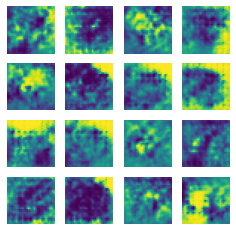

Time for training : 778 sec


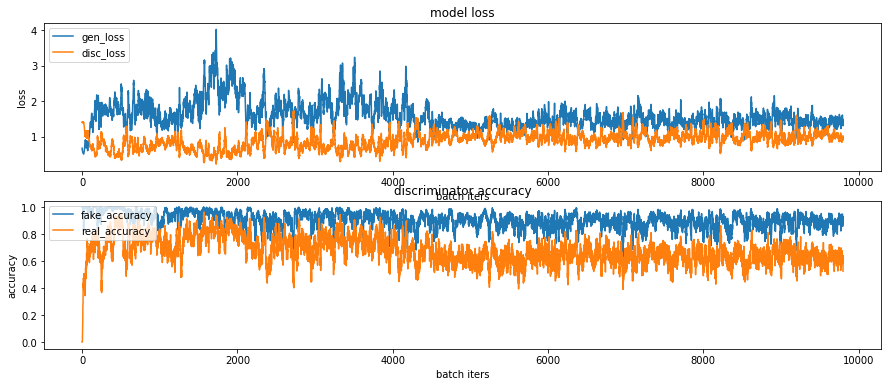

CPU times: user 13min 31s, sys: 1min 20s, total: 14min 51s
Wall time: 12min 59s


In [32]:
%%time
train(train_dataset, EPOCHS, save_every)

# 학습과정의 loss, accuracy 그래프 이미지 파일이 
# ~/aiffel/dcgan_newimage/fashion2/training_history 경로에 생성
# 진행 과정을 수시로 확인해 보기

### 8.2 Check the Result

In [2]:
anim_file = os.getenv('HOME')+'/aiffel/dcgan_newimage/result_cifar10/cifar10_dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/dcgan_newimage/result_cifar10/generated_samples/sample*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/dcgan_newimage/result_cifar10/cifar10_dcgan.gif

-rw-r--r-- 1 root root 1339019 Feb 15 09:15 /aiffel/aiffel/dcgan_newimage/result_cifar10/cifar10_dcgan.gif


![Result_Image](https://user-images.githubusercontent.com/97002540/154030732-e473fdd7-3178-469d-b5a1-975f3e9c1a6f.gif)

In [3]:
anim_file = os.getenv('HOME')+'/aiffel/dcgan_newimage/result_cifar10/graph_cifar10_dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/dcgan_newimage/result_cifar10/training_history/train_history*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/dcgan_newimage/result_cifar10/graph_cifar10_dcgan.gif

-rw-r--r-- 1 root root 613942 Feb 15 09:15 /aiffel/aiffel/dcgan_newimage/result_cifar10/graph_cifar10_dcgan.gif


![Result_Graph](https://user-images.githubusercontent.com/97002540/154030787-c2bd121c-b10a-4f5b-9807-d57b4c592380.gif)

### 8.3 Conclusion

* 생성된 이미지를 확인했을 시 어떤 객체인지 파악할 수가 없다.
* 대체적으로 loss도 높게 나타나며, accuracy의 경우 0.5로 수렴하는 양상을 확인할 수가 없다.
* 모델 개선이 필요하다.

### 9. Improving the GAN Training Process

### 9.1 Increase Epochs

* Load the saved training model and train additional 450 epochs.
* Check the results of a total of 500 epochs.

<img src="https://github.com/Min-ju-Kim/E-10.ImageCreation/blob/main/GIF/Attachment1_Image.gif?raw=true">

![Attachment1_Graph](https://user-images.githubusercontent.com/97002540/154026413-fb55c62c-12ba-4fc0-85c4-438754414807.gif)

* 적은 Epoch로 형체를 알아볼수 없다.
* `fake_accuracy`가 1에 근접한 값을 가진다.

* Refer to file `Attachment1.ImageCreate_Epoch.ipynb` for detail

### 9.2 Only in Cat Class

* It takes a lot of time to training.
* Training only in cat class.

### 9.2.1 500 Epochs

* Check the results of a total of 500 epochs only in cat class.

![Attachment2_Image](https://user-images.githubusercontent.com/97002540/154026885-509931bb-432f-4e72-83d0-d45278a21c9d.gif)

![Attachment2_Graph](https://user-images.githubusercontent.com/97002540/154026995-be3f6211-5218-4ba7-804e-b4178cdc84a3.gif)

* 학습시간이 너무 많이 걸리므로 cat class에 대해서만 이미지 생성을 진행한다.
* 아직 형체를 알아볼 수 없으며, `fake_accuracy`가 1에 근접한 값을 가진다.

* Epoch를 10배 늘려 진행했다.
* 라인이 잡히는 것처럼 보이나, 여전히 형체를 알아볼 수 없다.
* `fake_accuracy`가 여전히 1에 근접한 값을 가진다.

* Refer to file `Attachment2.ImageCreate_Cat(500).ipynb` for detail

### 9.2.2 3,000 Epochs

* Load the saved training model and train additional 2500 epochs.
* Check the results of a total of 3000 epochs.

![Attachment3_Image](https://user-images.githubusercontent.com/97002540/154027586-99c1ca57-1d9e-4202-9676-c99c39a1e324.gif)

<img src="https://github.com/Min-ju-Kim/E-10.ImageCreation/blob/main/GIF/Attachment3_Graph.gif?raw=true">

* 이전 모델을 불러와 2500Epochs를 추가로 진행해 총 3000Epochs의 결과를 확인했다.
* 라인이 잡혀가는 것이 확인된다.
* 하지만 `fake_accuracy`가 여전히 1에 근접한 값을 가진다.

* Refer to file `Attachment3.ImageCreate_Cat(3000).ipynb` for detail

### 9.2.3 6,000 Epochs

* Load the saved training model and train additional 3000 epochs.
* Check the results of a total of 6000 epochs.

![cifar10_dcgan](https://user-images.githubusercontent.com/97002540/154028050-806671d7-9383-42cc-8a4a-92b5007e58d0.gif)

<img src="https://github.com/Min-ju-Kim/E-10.ImageCreation/blob/main/GIF/Attachment4_Graph.gif?raw=true">

* 이전 모델을 불러와 3000Epochs를 추가로 진행해 총 6000Epochs의 결과를 확인했다.
* 나름 고양이의 형태가 확인된다.
* 하지만 `Fake_accuracy`가 여전히 1에 근접한 값을 가진다.

* Refer to file `Attachment4.ImageCreate_Cat(6000).ipynb` for detail

### 9.2.4 Modifying Parameters (500 Epochs)

* Improving the GAN training process by modifying parameters
* LeakyReLU : alpha=0.2
* Adam : learning_rate=0.0002, beta_1=0.5
* Generator : ReLU → SeLU

![cifar10_dcgan (1)](https://user-images.githubusercontent.com/97002540/154028651-e6f30e8d-7a3b-441d-a0c0-e18a8be35df6.gif)

![graph_cifar10_dcgan (1)](https://user-images.githubusercontent.com/97002540/154028826-79d4e4ad-7982-49cb-9a1f-b0febd4bdd62.gif)

* 이미지의 정확한 확인을 위해 컬러로 출력하게 만들었다.
* Model의 Parameter를 DCGAN Model을 처음 선보인 논문 내에서 제시한 가이드라인으로 조정했다.
* 고양이의 형태가 보이는 것 같다.<br>GIF 결과 파일을 보고 있으면 고양이의 라인이 그려지며,빈칸을 채워넣어 가는 형식으로 모델이 이미지를 생성한다.
* `fake_accuracy`, `real_accuracy`모두 이전에 비해 0.5로 수렴되는 양상이 확인된다.
* loss가 높게 나오는 것이 살짝 아쉽다.

* Refer to file `Attachment5.ImageCreate_Cat_Parameter.ipynb` for detail

### 9.2.5 Modifying Parameters (3000 Epochs)

* Load the saved training model and train additional 2500 epochs.
* Check the results of a total of 3000 epochs.

![cifar10_dcgan](https://user-images.githubusercontent.com/97002540/154038431-5888415c-db81-4916-97db-e9d434dfebea.gif)

![graph_cifar10_dcgan](https://user-images.githubusercontent.com/97002540/154038507-81ce5b8d-d39e-4bef-abb9-9650146e53cf.gif)

* 이전 모델을 불러와 2500Epochs를 더 진행해보았다.
* 고양이 코, 눈, 귀 같이 세부적인 부분을 채워가는 양상이 확인된다.
* `fake_accuracy`, `real_accuracy`에는 큰 변화를 보이지는 않았지만, Epoch가 진행됨에 따라 `disc_loss`가 낮아지는 것을 확인할 수 있다.

* file `Attachment6.ImageCreate_Cat_Parameter(3000).ipynb` deleted

### 9.2.6 Modifying  the Generator Model (500 Epochs)

* Add an additional layer of generator

![Attachment7_Image](https://user-images.githubusercontent.com/97002540/154029707-81a36885-8298-41e3-8f42-3b15b6a46b4e.gif)

![Attachment7_Graph](https://user-images.githubusercontent.com/97002540/154029742-719c5077-f7e6-4e65-9a1c-77c4664795e9.gif)

* 이미지를 생성하는 시간이 너무 느려 생성자 모델의 layer를 쌓아 생성자 모델의 CAPA를 높여보았다.
* 이미지 생성 시간이 단축되지는 못했다.
* 생성하는 고양이 이미지가 비슷하다는 점에서 이미지의 품질이 낮다고 볼 수 있다.
* 생성자와 판별자 모델의 균형이 맞지 않는 경우 생성되는 이미지의 품질이 급격히 낮아짐을 알 수 있다.

* Refer to file `Attachment7.ImageCreate_Cat_Model.ipynb` for detail

### 9.3 Training CIFAR10 Image

* Try training with the cifar10 image with modifying model.

<img src="https://github.com/Min-ju-Kim/E-10.ImageCreation/blob/main/GIF/Attachment8_Image.gif?raw=true">

![graph_cifar10_dcgan](https://user-images.githubusercontent.com/97002540/154030225-465f7a1e-2196-4d4a-a4ca-f3cc08b6eaf5.gif)

* 가장 좋은 결과를 보였던 모델을 CIFAR10에 적용시켜보았다.
* 너무 적은 batch 단위를 설정해 시간이 너무 오래 걸렸다.
* 선명하진 않으나, 어떤 물체인 것 같다 정도를 판단할 수 있는 이미지가 만들어졌다.
* 시간을 조금 더 들였다면 분간이 가능한 이미지를 얻을 수 있었을 것 같기도 하다. 
* 시간이 지날수록 정확도가 점점 1에 가까워자다 일정 수준에 유지되는 것이 확인된다.
* batch 단위 외 다른 파라미터 조정으로 개선해 볼 수 있을 것 같다.

* Refer to file `Attachment8.ImageCreate_Cifar10.ipynb` for detail

### 10. Retrospection

### 10.1 What was difficult

* 이미지 생성되는데 너~무 시간이 많이 걸린다.😥 힘들엉
* GIF를 다시 컬러로 바꾸는 방법을 찾는게 힘들었다.
* 여러 시도를 해봤지만 생각만큼 좋은 결과를 얻지 못한 점이 좀 슬프다.

### 10.2 What I found out

* GAN에 대한 연구는 굉장히 많이 되어 있는 상태로 어떤 파라미터를 쓰면 성능이 개선되는지까지도 나와있다.(Reference 4. 참조)
* DCGAN 논문의 저자는 `label을 가지고 있다면 사용하는 것이 좋다.`라고 말한다.
  * GAN은 기본적으로 비지도학습 모델이지만, 지도/비지도 학습 모델(Semi-Supervised Learning)을 섞어서 사용할 수도 있다고 한다.
  * 소량의 분류된 데이터를 사용해 분류되지 않은 더 큰 데이터 세트를 보강하는 방법이다.
* 활성화함수 SELU
$$
SELU(x) = \lambda
\begin{cases}x~~~~~~~~~~~~~~~~~~if~~x~>~0
\\αe^x-α~~~~~~if~~x~≤~0
\end{cases}
$$

#### GAN 모델 평가 지표
* **Inception Score(IS)**
  * 분류 모델에 이미지를 입력할 경우 높은 확률로 클래스를 예측한다면 생성 이미지(Fake)와 실제 이미지(Real)와 비슷하다 할 수 있다. 이는 p(y|x)로 측정이 가능하다. 그리고 p(y|x)에서 x로 적분한 p(y)가 평등한 분포라면 생성된 이미지가 다양성을 갖고 있다 말할 수 있다. 이러한 두 가지 관점으로 생성된 이미지(Fake)를 평가하는 것
  * 하지만 이러한 IS의 경우 생성된(Fake) 이미지만 사용하기 때문에 실제 이미지와 비교하지 못한다는 단점이 있다.
  

* **Frechet Inception Distance (FID)**
  * IS의 단점을 개선하기 위해 고안된 지표로, 두 분포 사이의 거리를 측정하는데 사용되는 방법
    * 분류 모델에 따라 실제 이미지와 생성된 이미지의 특징량을 추출한다.
    * 특징량이 정규분포를 따른다 가정 후 그 분포 사이의 거리를 측정한다.
  * inception 네트워크의 중간 layer에서 feature를 추출하고 feature에서 평균과 공분산을 추출하고 계산한다.
  * FID 값이 낮으면 Real/Fake가 유사하다고 판단한다.
  * 단점은 표본의 분포가 정규분포가 아닐 경우 제한적인 통계량(평균, 분산)만으로는 분포의 차이를 잘못 설명할 수 있다는 점이 있다.

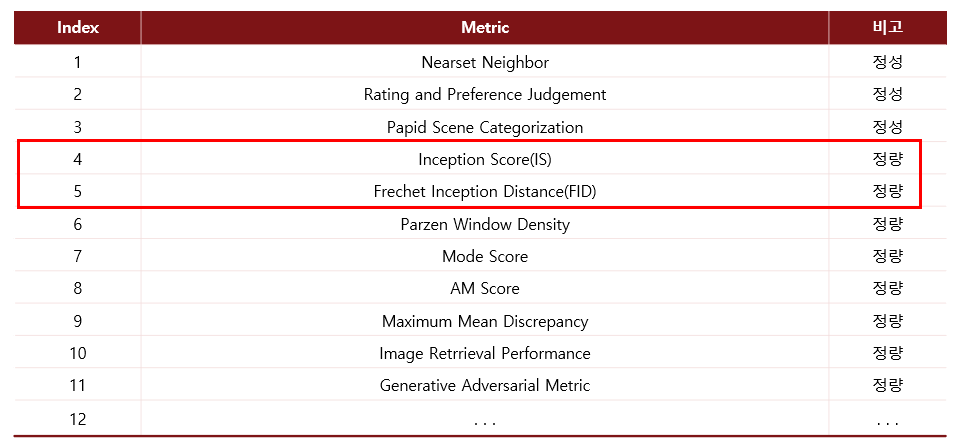
<center>[Img6] Summary of Quantitative GAN Generator Evaluation Methods</center>

### 10.3 What I want to know more about

* Discriminator가 학습한 feature의 어떤 부분을 active하게 하는지 확인해보는 것
* 실제로 출력해 확인해볼 수 있다고 한다. 고양이의 어떤 부분을 active하게 하는지 확인해보면 재밌을 듯하다.
* https://codebaragi23.github.io/books/DeepLearningFromKeras/Part2/Chapter5/5.4/
* https://velog.io/@sjinu/%EA%B0%9C%EB%85%90%EC%A0%95%EB%A6%AC-Filter-Visualization%ED%95%84%ED%84%B0-%EC%8B%9C%EA%B0%81%ED%99%94

### 10.4 Self-Resolution

* 모델이 가르쳐주지 않아도 스스로 학습을 하면서 이미지를 생성하는 것이 신기하게 느껴졌다. 
* 일반적으로 모델의 성능을 높여준다는 파라미터 설정값을 가져다 사용한다고 하더라도 데이터에 따라서 달라질 수 있다는 것을 알게되었다.
* 공부할게 넘쳐나는구나😅

**[References]**

1. GAN, DCGAN이란?
* https://roytravel.tistory.com/109
2. DCGAN 하이퍼파라미터 조정 근거
* https://kdeon.tistory.com/60?category=941837
* https://flonelin.wordpress.com/2020/05/20/%EC%95%88%EC%A0%95%EC%A0%81%EC%9D%B8-generative-adversarial-network-%ED%8A%B8%EB%A0%88%EC%9D%B4%EB%8B%9D%EC%9D%84-%EC%9C%84%ED%95%9C-%ED%8C%81%EB%93%A4/
3. GAN 모델 결과 해석 방법
* https://machinelearningmastery.com/practical-guide-to-gan-failure-modes/
4. GAN 논문
* https://arxiv.org/pdf/1511.06434.pdf
* https://arxiv.org/pdf/1406.2661.pdf
5. GAN 모델 평가
* https://wikidocs.net/149481
* https://roytravel.tistory.com/109
* https://machinelearningmastery.com/how-to-implement-the-frechet-inception-distance-fid-from-scratch/
6. 비지도 학습
* https://ebbnflow.tistory.com/165
7. 활성화함수
* https://mlfromscratch.com/activation-functions-explained/#/

**[Attachments]**

* Attachment1.ImageCreate_Epoch.ipynb
* Attachment2.ImageCreate_Cat(500).ipynb
* Attachment3.ImageCreate_Cat(3000).ipynb
* Attachment4.ImageCreate_Cat(6000).ipynb
* Attachment5.ImageCreate_Cat_Parameter.ipynb
* Attachment6.ImageCreate_Cat_Parameter(3000).ipynb (deleted) :-(
* Attachment7.ImageCreate_Cat_Model.ipynb
* Attachment8.ImageCreate_Cifar10.ipynb